# Required Packages:

In [5]:
#Import all necessary packages: Sklearn is used here for ML modeling 

#pip install ipython-autotime / this will automatically output the time it takes for each cell to run
%load_ext autotime
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier, VotingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt
import itertools
from sklearn import metrics

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 61.1 ms


# Set-up:

- Data is imported from csv file (make sure that file is saved in Jupyter Notebooks under the same profile as this code.

- Modify the data as needed to prepare for modeling. This program currently only allows for integer values as data, no strings.

- Double check to ensure you have the correct independent and dependent variables. (dependent variable(s) = targeted outcome; independent variables = variables that effect the targeted outcome)

In [2]:
#Import data from CSV file, verify it is the correct data
data = pd.read_csv('KDDTest+.csv')
data.head()

duration protocol_type service  flag  src_bytes  dst_bytes  land  \
0       805           tcp    http  RSTR      76944          1     0   
1      2079           tcp    http  RSTR      72564          0     0   
2      2079           tcp    http  RSTR      69644          0     0   
3         0           tcp    http    S0          0          0     0   
4      2069           tcp    http  RSTR      72564          0     0   

   wrong_fragment  urgent  hot  ...  dst_host_diff_srv_rate  \
0               0       0    0  ...                    0.01   
1               0       0    0  ...                    0.01   
2               0       0    0  ...                    0.01   
3               0       0    0  ...                    0.00   
4               0       0    0  ...                    0.01   

   dst_host_same_src_port_rate  dst_host_srv_diff_host_rate  \
0                          0.0                          0.0   
1                          0.0                          0.0   
2                          0.0                          0.0   
3                          0.0                          0.0   
4                          0.0                          0.0   

   dst_host_serror_rate  dst_host_srv_serror_rate  dst_host_rerror_rate  \
0                  0.00                      0.00                  0.07   
1                  0.00                      0.00                  0.17   
2                  0.00                      0.00                  0.17   
3                  0.65                      0.65                  0.32   
4                  0.02                      0.02                  0.47   

   dst_host_svr_rerror_rate  Attack_Types   -  Attack  
0                      0.07       apache2  14       0  
1                      0.18       apache2  14       0  
2                      0.19       apache2  14       0  
3                      0.32       apache2  18       0  
4                      0.49       apache2  15       0  

[5 rows x 44 columns]

time: 495 ms


In [3]:
#Prepare the data: df_x = independent variables from dataset; df_y = dependent variable from dataset
df_x = data.iloc[:,4:40]
df_y = data.iloc[:,41]

#verify you chose the correct variables
print("Independent Variables:")
i=0
for col in df_x.columns: 
    i=i+1;
    print(i,"-",col)
print("")
print("Dependent Variable:",'\n',df_y.describe())

#Split the test and train data: test_size= % of data used to test, the rest is used to train; random_state is how it splits the test and training data (constant # means consistant state, a pseudo-random number generator can be used if you want the split to be more random)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

Independent Variables:
1 - src_bytes
2 - dst_bytes
3 - land
4 - wrong_fragment
5 - urgent
6 - hot
7 - num_failed_logins
8 - logged_in
9 - num_compromised
10 - root_shell
11 - su_attempted
12 - num_root
13 - num_file_creations
14 - num_shells
15 - num_access_files
16 - num_outbound_cmds
17 - is_host_login
18 - is_guest_login
19 - count
20 - srv_count
21 - serror_rate
22 - srv_serror_rate
23 - rerror_rate
24 - srv_rerror_rate
25 - same_svr_rate
26 - diff_srv_rate
27 - srv_diff_host_rate
28 - dst_host_count
29 - dst_host_srv_count
30 - dst_host_same_srv_rate
31 - dst_host_diff_srv_rate
32 - dst_host_same_src_port_rate
33 - dst_host_srv_diff_host_rate
34 - dst_host_serror_rate
35 - dst_host_srv_serror_rate
36 - dst_host_rerror_rate

Dependent Variable: 
 count      22542
unique        37
top       normal
freq        9710
Name: Attack_Types, dtype: object
time: 120 ms


# _______________________________________
# **Decision Tree**

### DecisionTreeClassifier Parameters:
Source: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html (website), https://github.com/scikit-learn/scikit-learn/blob/fd237278e/sklearn/tree/_classes.py#L597 (github)

- #### criterion{“gini”, “entropy”}, default=”gini”:
    The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

- #### splitter{“best”, “random”}, default=”best”:
    The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- #### max_depth; int, default=None:
    The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- #### min_samples_split; int or float, default=2:
    The minimum number of samples required to split an internal node:

        If int, then consider min_samples_split as the minimum number.

        If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) 
        are the minimum number of samples for each split.


- #### min_samples_leaf; int or float, default=1:
    The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

        If int, then consider min_samples_leaf as the minimum number.

        If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) 
        are the minimum number of samples for each node.


- #### min_weight_fraction_leaf; float, default=0.0:
    The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.

- #### max_features; int, float or {“auto”, “sqrt”, “log2”}, default=None:
    The number of features to consider when looking for the best split:

        If int, then consider max_features features at each split.

        If float, then max_features is a fraction and int(max_features * n_features) 
        features are considered at each split.

        If “auto”, then max_features=sqrt(n_features).

        If “sqrt”, then max_features=sqrt(n_features).

        If “log2”, then max_features=log2(n_features).

        If None, then max_features=n_features.

    Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

- #### random_state; int, RandomState instance, default=None:
    Controls the randomness of the estimator. The features are always randomly permuted at each split, even if splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before finding the best split among them. But the best found split may vary across different runs, even if max_features=n_features. That is the case, if the improvement of the criterion is identical for several splits and one split has to be selected at random. To obtain a deterministic behaviour during fitting, random_state has to be fixed to an integer.

- #### max_leaf_nodes; int, default=None:
    Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

- #### min_impurity_decrease; float, default=0.0:
    A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

        The weighted impurity decrease equation is the following:
        N_t / N * (impurity - N_t_R / N_t * right_impurity
                            - N_t_L / N_t * left_impurity)
        
        where ``N`` is the total number of samples, ``N_t`` is the number of
        samples at the current node, ``N_t_L`` is the number of samples in the
        left child, and ``N_t_R`` is the number of samples in the right child.
        
        ``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,
        if ``sample_weight`` is passed.

- #### min_impurity_split; float, default=0:
    Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.

- #### class_weight; dict, list of dict or “balanced”, default=None:
    Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

        Note that for multioutput (including multilabel) weights should be defined 
        for each class of every column in its own dict. For example, for four-class 
        multilabel classification weights should be [{0: 1, 1: 1}, {0: 1, 1: 5}, 
        {0: 1, 1: 1}, {0: 1, 1: 1}] instead of [{1:1}, {2:5}, {3:1}, {4:1}].

    The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

    For multi-output, the weights of each column of y will be multiplied.

        Note that these weights will be multiplied with sample_weight 
        (passed through the fit method) if sample_weight is specified.



- #### ccp_alpha; non-negative float, default=0.0
    Complexity parameter used for Minimal Cost-Complexity Pruning. The subtree with the largest cost complexity that is smaller than ccp_alpha will be chosen. By default, no pruning is performed. 

The model outcome using the training data:
accuracy: 0.9976154827261132
precision: 0.9976075697064232
recall: 0.9976154827261132

The model outcome using the testing data:
accuracy: 0.9707252162341983
precision: 0.9725004028889916
recall: 0.9707252162341983

DecisionTreeClassifier()



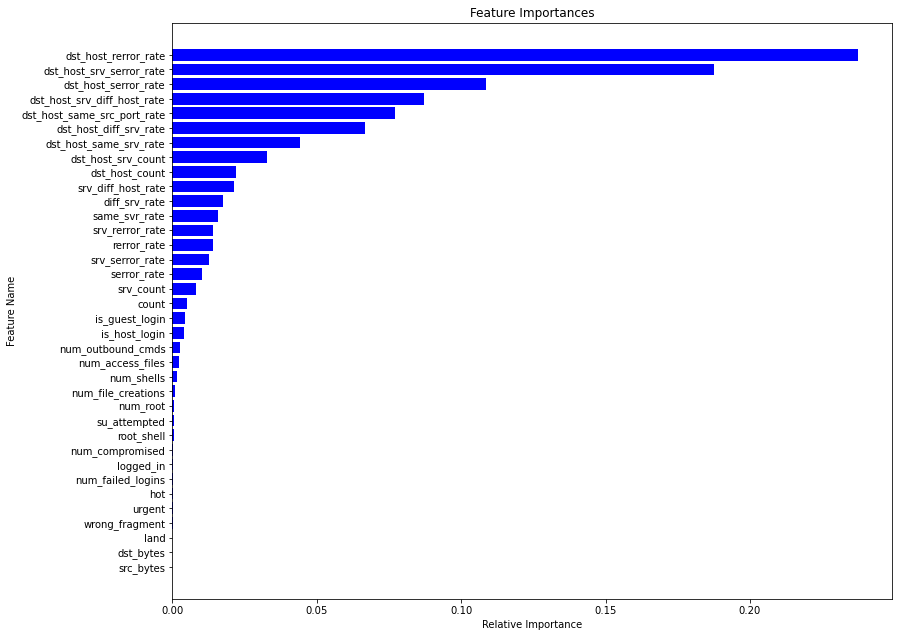


**Classification report is:
                  precision    recall  f1-score   support

        apache2       1.00      0.99      1.00       159
           back       0.99      1.00      0.99        77
buffer_overflow       0.62      0.71      0.67         7
      ftp_write       0.00      0.00      0.00         0
   guess_passwd       0.99      0.99      0.99       229
     httptunnel       0.85      0.96      0.90        24
        ipsweep       0.85      0.94      0.89        18
           land       0.50      0.50      0.50         2
     loadmodule       0.00      0.00      0.00         0
       mailbomb       1.00      1.00      1.00        62
          mscan       0.98      0.98      0.98       201
       multihop       0.00      0.00      0.00         3
          named       0.12      0.50      0.20         2
        neptune       1.00      1.00      1.00       952
           nmap       1.00      1.00      1.00        15
         normal       0.98      0.97      0.98      1941


In [4]:
#Descision Tree
#Use this if you already know what parameters you want (no pruning neccessary)


#Call function from sklearn (parameters can be adjusted accordingly to change results)
dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
                            random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                            min_impurity_split=None, class_weight=None, ccp_alpha=0.0)

#Fit to the training data
dt.fit(x_train,y_train)

#expected high performance since this is the same data the model was built using
print("The model outcome using the training data:") 
print("accuracy:", dt.score(x_train, y_train))
y_pred = dt.predict(x_train)
print("precision:", precision_score(y_train, y_pred, average='weighted', zero_division=0))
print("recall:", recall_score(y_train, y_pred, average='weighted', zero_division=0))

print("")

#more accurate representation on how well the model works; model tested on "new" data
print("The model outcome using the testing data:")
print("accuracy:", dt.score(x_test, y_test))
y_pred = dt.predict(x_test)
print("precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))

print("")

print(dt)
print("")


#this will show you which features in your data are most important and how important they are
ft_imp = pd.Series(dt.feature_importances_, index=df_x.columns).sort_values(ascending=True)

plt.title('Feature Importances')
plt.barh(range(len(ft_imp)), ft_imp, color='b', align='center')
plt.yticks(range(len(ft_imp)), df_x.columns)
plt.xlabel('Relative Importance')
plt.ylabel('Feature Name')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.gcf().subplots_adjust(left=0, right=10)
plt.gcf().subplots_adjust(top=2, bottom=0)
plt.gcf().set_size_inches(1, plt.gcf().get_size_inches()[1])
plt.show()


print('\n**Classification report is:\n', metrics.classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, 
                                    output_dict=False, zero_division=0))

In [ ]:
#Use this to aid in pruning the decision tree. This will run through multiple iterations using a 
#combination of set paremeters and output the best parameter; takes longer than the previous code
#source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#Define what parameters value combinations you want to test; the more combination, the longer it takes to run the code
param_grid = {
    'max_depth': [5,10,15,20,25],
    'min_samples_leaf': [2,4,6,8,10],
    'max_leaf_nodes': [60,70,80,90,100]}

#Initiate iterations under set conditions and output what the best parameter combination and outcome is
gs = GridSearchCV(dt, param_grid, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, 
                  pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=False)
gs.fit(df_x, df_y)
print("best params:", gs.best_params_)
print("best score:", gs.best_score_) 

#Set the best parameter combination as your function
dt=gs.best_estimator_
print("")

#Fit to the training data
dt.fit(x_train,y_train)

#expected high performance since this is the same data the model was built using
print("The model outcome using the training data:") 
print("accuracy:", dt.score(x_train, y_train))
y_pred = dt.predict(x_train)
print("precision:", precision_score(y_train, y_pred, average='weighted', zero_division=0))
print("recall:", recall_score(y_train, y_pred, average='weighted', zero_division=0))

print("")

#more accurate representation on how well the model works; model tested on "new" data
print("The model outcome using the testing data:")
print("accuracy:", dt.score(x_test, y_test))
y_pred = dt.predict(x_test)
print("precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))

print("")

print(dt)
print("")

#this will show you which features in your data are most important and how important they are
ft_imp = pd.Series(dt.feature_importances_, index=df_x.columns).sort_values(ascending=True)

plt.title('Feature Importances')
plt.barh(range(len(ft_imp)), ft_imp, color='b', align='center')
plt.yticks(range(len(ft_imp)), df_x.columns)
plt.xlabel('Relative Importance')
plt.ylabel('Feature Name')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.gcf().subplots_adjust(left=0, right=10)
plt.gcf().subplots_adjust(top=2, bottom=0)
plt.gcf().set_size_inches(1, plt.gcf().get_size_inches()[1])
plt.show()

# Visualizing the Decision Tree

Question asked about the data based on a value of a feature. Each question has either a True or False answer that splits the node. Based on the answer to the question, a data point moves down the tree.

- gini: The Gini Impurity of the node. The average weighted Gini Impurity decreases as we move down the tree.

- samples: The number of observations in the node.

- value: The number of samples in each class. For example, the top node has 2 samples in class 0 and 4 samples in class 1.

- class: The majority classification for points in the node. In the case of leaf nodes, this is the prediction for all samples in the node


## Parameters: 
Sources: https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html (website), https://github.com/scikit-learn/scikit-learn/blob/fd237278e/sklearn/tree/_export.py#L661 (github)

- #### decision_tree : decision tree classifier
    The decision tree to be exported to GraphViz.

- #### out_file : file object or string, optional (default=None)
    Handle or name of the output file. If ``None``, the result is
    returned as a string.
    .. versionchanged:: 0.20
        Default of out_file changed from "tree.dot" to None.

- #### max_depth : int, optional (default=None)
    The maximum depth of the representation. If None, the tree is fully
    generated.

- #### feature_names : list of strings, optional (default=None)
    Names of each of the features.

- #### class_names : list of strings, bool or None, optional (default=None)
    Names of each of the target classes in ascending numerical order.
    Only relevant for classification and not supported for multi-output.
    If ``True``, shows a symbolic representation of the class name.

- #### label : {'all', 'root', 'none'}, optional (default='all')
    Whether to show informative labels for impurity, etc.
    Options include 'all' to show at every node, 'root' to show only at
    the top root node, or 'none' to not show at any node.

- #### filled : bool, optional (default=False)
    When set to ``True``, paint nodes to indicate majority class for
    classification, extremity of values for regression, or purity of node
    for multi-output.

- #### leaves_parallel : bool, optional (default=False)
    When set to ``True``, draw all leaf nodes at the bottom of the tree.

- #### impurity : bool, optional (default=True)
    When set to ``True``, show the impurity at each node.

- #### node_ids : bool, optional (default=False)
    When set to ``True``, show the ID number on each node.

- #### proportion : bool, optional (default=False)
    When set to ``True``, change the display of 'values' and/or 'samples'
    to be proportions and percentages respectively.

- #### rotate : bool, optional (default=False)
    When set to ``True``, orient tree left to right rather than top-down.

- #### rounded : bool, optional (default=False)
    When set to ``True``, draw node boxes with rounded corners and use
    Helvetica fonts instead of Times-Roman.

- #### special_characters : bool, optional (default=False)
    When set to ``False``, ignore special characters for PostScript
    compatibility.

- #### precision : int, optional (default=3)
    Number of digits of precision for floating point in the values of
    impurity, threshold and value attributes of each node.


In [12]:
#This creates a visualization of the Decision Tree created (comment out when doing trials to docrease runtime)
#Using "pip install graphviz" or "conda install graphviz" in command terminal to install graphviz 
#source: http://www.graphviz.org/download/

import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import Image
dot_file = export_graphviz(dt, out_file=None, max_depth=None, feature_names=df_x.columns, class_names= df_y, 
                           label='all', filled=True, leaves_parallel=False, impurity=True, node_ids=True, 
                           proportion=True, rotate=False, rounded=True, special_characters=False, precision=3)
graph = graphviz.Source(dot_file)
graph.render(filename='decisiontree', format='png', cleanup=True)

from IPython.display import Image
Image(filename='decisiontree.png') 

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.486627 to fit


time: 27.2 s


# Random Forest - Ensemble of Decision Trees

   A random forest is a meta estimator that fits a number of decision tree
classifiers on various sub-samples of the dataset and uses averaging to
improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.
    
## Parameters:
Source: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html (website), https://github.com/scikit-learn/scikit-learn/blob/fd237278e/sklearn/ensemble/_forest.py#L883 (github)

    The default values for the parameters controlling the size of the trees
(e.g. ``max_depth``, ``min_samples_leaf``, etc.) lead to fully grown and
unpruned trees which can potentially be very large on some data sets. To
reduce memory consumption, the complexity and size of the trees should be
controlled by setting those parameter values.
    

- #### n_estimators : int, default=100:
    The number of trees in the forest.
       The default value of ``n_estimators`` changed from 10 to 100.
       
- #### criterion : {"gini", "entropy"}, default="gini":
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.
    Note: this parameter is tree-specific.
    
- #### max_depth : int, default=None:
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.
    
- #### min_samples_split : int or float, default=2:
    The minimum number of samples required to split an internal node:
    - If int, then consider `min_samples_split` as the minimum number.
    - If float, then `min_samples_split` is a fraction and
      `ceil(min_samples_split * n_samples)` are the minimum
      number of samples for each split.

- #### min_samples_leaf : int or float, default=1:
    The minimum number of samples required to be at a leaf node.
    A split point at any depth will only be considered if it leaves at
    least ``min_samples_leaf`` training samples in each of the left and
    right branches.  This may have the effect of smoothing the model,
    especially in regression.
    - If int, then consider `min_samples_leaf` as the minimum number.
    - If float, then `min_samples_leaf` is a fraction and
      `ceil(min_samples_leaf * n_samples)` are the minimum
      number of samples for each node.

- #### min_weight_fraction_leaf : float, default=0.0:
    The minimum weighted fraction of the sum total of weights (of all
    the input samples) required to be at a leaf node. Samples have
    equal weight when sample_weight is not provided.
    
- #### max_features : {"auto", "sqrt", "log2"}, int or float, default="auto":
    The number of features to consider when looking for the best split:
    - If int, then consider `max_features` features at each split.
    - If float, then `max_features` is a fraction and
      `int(max_features * n_features)` features are considered at each
      split.
    - If "auto", then `max_features=sqrt(n_features)`.
    - If "sqrt", then `max_features=sqrt(n_features)` (same as "auto").
    - If "log2", then `max_features=log2(n_features)`.
    - If None, then `max_features=n_features`.
    Note: the search for a split does not stop until at least one
    valid partition of the node samples is found, even if it requires to
    effectively inspect more than ``max_features`` features.
    
- #### max_leaf_nodes : int, default=None:
    Grow trees with ``max_leaf_nodes`` in best-first fashion.
    Best nodes are defined as relative reduction in impurity.
    If None then unlimited number of leaf nodes.
    
- #### min_impurity_decrease : float, default=0.0:
    A node will be split if this split induces a decrease of the impurity
    greater than or equal to this value.
    The weighted impurity decrease equation is the following::
        N_t / N * (impurity - N_t_R / N_t * right_impurity
                            - N_t_L / N_t * left_impurity)
    where ``N`` is the total number of samples, ``N_t`` is the number of
    samples at the current node, ``N_t_L`` is the number of samples in the
    left child, and ``N_t_R`` is the number of samples in the right child.
    ``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,
    if ``sample_weight`` is passed.

- #### min_impurity_split : float, default=None:
    Threshold for early stopping in tree growth. A node will split
    if its impurity is above the threshold, otherwise it is a leaf.

- #### bootstrap : bool, default=True:
    Whether bootstrap samples are used when building trees. If False, the
    whole dataset is used to build each tree.
    
- #### oob_score : bool, default=False:
    Whether to use out-of-bag samples to estimate
    the generalization accuracy.
    
- #### n_jobs : int, default=None:
    The number of jobs to run in parallel. :meth:`fit`, :meth:`predict`,
    :meth:`decision_path` and :meth:`apply` are all parallelized over the
    trees. ``None`` means 1 unless in a :obj:`joblib.parallel_backend`
    context. ``-1`` means using all processors. 
    
- #### random_state : int or RandomState, default=None:
    Controls both the randomness of the bootstrapping of the samples used
    when building trees (if ``bootstrap=True``) and the sampling of the
    features to consider when looking for the best split at each node
    (if ``max_features < n_features``).

- #### verbose : int, default=0:
    Controls the verbosity when fitting and predicting.
    
- #### warm_start : bool, default=False:
    When set to ``True``, reuse the solution of the previous call to fit
    and add more estimators to the ensemble, otherwise, just fit a whole
    new forest. 
    
- #### class_weight : {"balanced", "balanced_subsample"}, dict or list of dicts, default=None:
    Weights associated with classes in the form ``{class_label: weight}``.
    If not given, all classes are supposed to have weight one. For
    multi-output problems, a list of dicts can be provided in the same
    order as the columns of y.
    Note that for multioutput (including multilabel) weights should be
    defined for each class of every column in its own dict. For example,
    for four-class multilabel classification weights should be
    [{0: 1, 1: 1}, {0: 1, 1: 5}, {0: 1, 1: 1}, {0: 1, 1: 1}] instead of
    [{1:1}, {2:5}, {3:1}, {4:1}].
    The "balanced" mode uses the values of y to automatically adjust
    weights inversely proportional to class frequencies in the input data
    as ``n_samples / (n_classes * np.bincount(y))``
    The "balanced_subsample" mode is the same as "balanced" except that
    weights are computed based on the bootstrap sample for every tree
    grown.
    For multi-output, the weights of each column of y will be multiplied.
    Note that these weights will be multiplied with sample_weight (passed
    through the fit method) if sample_weight is specified.
    
- #### ccp_alpha : non-negative float, default=0.0:
    Complexity parameter used for Minimal Cost-Complexity Pruning. The
    subtree with the largest cost complexity that is smaller than
    ``ccp_alpha`` will be chosen. By default, no pruning is performed.
    
- #### max_samples : int or float, default=None:
    If bootstrap is True, the number of samples to draw from X
    to train each base estimator.
    - If None (default), then draw `X.shape[0]` samples.
    - If int, then draw `max_samples` samples.
    - If float, then draw `max_samples * X.shape[0]` samples. Thus,
      `max_samples` should be in the interval `(0, 1)`.

The model outcome using the training data:
accuracy: 0.9948427882215938
precision: 0.994745223222682
recall: 0.9948427882215938

The model outcome using the testing data:
accuracy: 0.9782656908405412
precision: 0.9767119338457882
recall: 0.9782656908405412

RandomForestClassifier(max_depth=15)



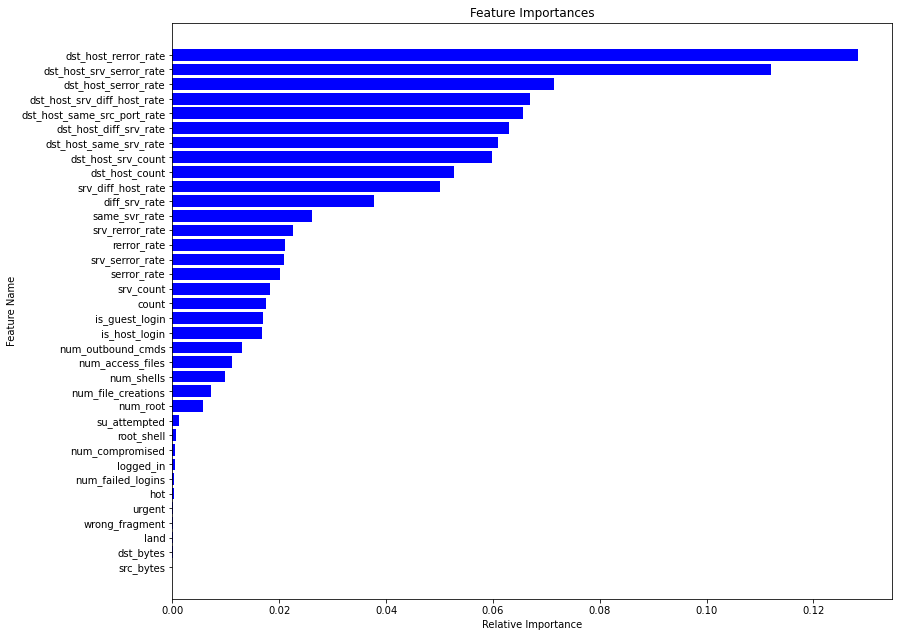


**Classification report is:
                  precision    recall  f1-score   support

        apache2       1.00      0.99      1.00       159
           back       1.00      1.00      1.00        77
buffer_overflow       1.00      0.71      0.83         7
   guess_passwd       1.00      1.00      1.00       229
     httptunnel       1.00      0.96      0.98        24
        ipsweep       0.90      1.00      0.95        18
           land       0.50      0.50      0.50         2
       mailbomb       1.00      1.00      1.00        62
          mscan       0.99      1.00      0.99       201
       multihop       0.00      0.00      0.00         3
          named       1.00      1.00      1.00         2
        neptune       1.00      1.00      1.00       952
           nmap       1.00      1.00      1.00        15
         normal       0.97      0.99      0.98      1941
           perl       0.00      0.00      0.00         1
            pod       1.00      1.00      1.00         6


In [29]:
#Random Forest - Ensemble of Descision Trees
#Use this if you already know what parameters you want (no pruning neccessary)


#Call function from sklearn (parameters can be adjusted accordingly to change results)
rf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=15, min_samples_split=2, 
                            min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                            max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                            bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, 
                            warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

#Fit to the training data
rf.fit(x_train,y_train)

#expected high performance since this is the same data the model was built using
print("The model outcome using the training data:") 
print("accuracy:", rf.score(x_train, y_train))
y_pred = rf.predict(x_train)
print("precision:", precision_score(y_train, y_pred, average='weighted', zero_division=0))
print("recall:", recall_score(y_train, y_pred, average='weighted', zero_division=0))

print("")

#more accurate representation on how well the model works; model tested on "new" data
print("The model outcome using the testing data:")
print("accuracy:", rf.score(x_test, y_test))
y_pred = rf.predict(x_test)
print("precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("")

print(rf)
print("")

#this will show you which features in your data are most important and how important they are
ft_imp = pd.Series(rf.feature_importances_, index=df_x.columns).sort_values(ascending=True)

plt.title('Feature Importances')
plt.barh(range(len(ft_imp)), ft_imp, color='b', align='center')
plt.yticks(range(len(ft_imp)), df_x.columns)
plt.xlabel('Relative Importance')
plt.ylabel('Feature Name')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.gcf().subplots_adjust(left=0, right=10)
plt.gcf().subplots_adjust(top=2, bottom=0)
plt.gcf().set_size_inches(1, plt.gcf().get_size_inches()[1])
plt.show()

print('\n**Classification report is:\n', metrics.classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, 
                                    output_dict=False, zero_division=0))

In [ ]:
#Use this to aid in pruning the random forest. This will run through multiple iterations using a 
#combination of set paremeters and output the best parameter; takes longer than the previous code
#source: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

#Define what parameters value combinations you want to test; the more combination, the longer it takes to run the code
param_grid = {
    'max_depth': [50, 100],
    'min_samples_leaf': [25, 50],
    'max_leaf_nodes': [10, 25],
    'n_estimators': [10, 25, 50]}

#Initiate iterations under set conditions and output what the best parameter combination and outcome is
gs = GridSearchCV(rf, param_grid, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, 
                  pre_dispatch='2*n_jobs', error_score=np.nan, return_train_score=False)
gs.fit(df_x, df_y)
print("best params:", gs.best_params_)
print("best score:", gs.best_score_) 

#Set the best parameter combination as your function
rf=gs.best_estimator_
print("")

#Fit to the training data
rf.fit(x_train,y_train)

#expected high performance since this is the same data the model was built using
print("The model outcome using the training data:") 
print("accuracy:", rf.score(x_train, y_train))
y_pred = rf.predict(x_train)
print("precision:", precision_score(y_train, y_pred, average='weighted', zero_division=0))
print("recall:", recall_score(y_train, y_pred, average='weighted', zero_division=0))

print("")

#more accurate representation on how well the model works; model tested on "new" data
print("The model outcome using the testing data:")
print("accuracy:", rf.score(x_test, y_test))
y_pred = rf.predict(x_test)
print("precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("")

print(rf)
print("")

#this will show you which features in your data are most important and how important they are
ft_imp = pd.Series(rf.feature_importances_, index=df_x.columns).sort_values(ascending=True)

plt.title('Feature Importances')
plt.barh(range(len(ft_imp)), ft_imp, color='b', align='center')
plt.yticks(range(len(ft_imp)), df_x.columns)
plt.xlabel('Relative Importance')
plt.ylabel('Feature Name')
plt.tick_params(axis='x', which='major', labelsize=10)
plt.gcf().subplots_adjust(left=0, right=10)
plt.gcf().subplots_adjust(top=2, bottom=0)
plt.gcf().set_size_inches(1, plt.gcf().get_size_inches()[1])
plt.show()


# Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base
classifiers each on random subsets of the original dataset and then
aggregate their individual predictions (either by voting or by averaging)
to form a final prediction. Such a meta-estimator can typically be used as
a way to reduce the variance of a black-box estimator (e.g., a decision
tree), by introducing randomization into its construction procedure and
then making an ensemble out of it.

## Parameters
Sources: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html (website), https://github.com/scikit-learn/scikit-learn/blob/fd237278e/sklearn/ensemble/_bagging.py#L432 (github)

- #### base_estimator : object, default=None:
    The base estimator to fit on random subsets of the dataset.
    If None, then the base estimator is a decision tree.
    
- #### n_estimators : int, default=10:
    The number of base estimators in the ensemble.

- #### max_samples : int or float, default=1.0:
    The number of samples to draw from X to train each base estimator (with
    replacement by default, see `bootstrap` for more details).
    - If int, then draw `max_samples` samples.
    - If float, then draw `max_samples * X.shape[0]` samples.

- #### max_features : int or float, default=1.0:
    The number of features to draw from X to train each base estimator (
    without replacement by default, see `bootstrap_features` for more
    details).
    - If int, then draw `max_features` features.
    - If float, then draw `max_features * X.shape[1]` features.

- #### bootstrap : bool, default=True:
    Whether samples are drawn with replacement. If False, sampling
    without replacement is performed.

- #### bootstrap_features : bool, default=False:
    Whether features are drawn with replacement.

- #### oob_score : bool, default=False:
    Whether to use out-of-bag samples to estimate
    the generalization error.

- #### warm_start : bool, default=False:
    When set to True, reuse the solution of the previous call to fit
    and add more estimators to the ensemble, otherwise, just fit
    a whole new ensemble. 

- #### n_jobs : int, default=None:
    The number of jobs to run in parallel for both :meth:`fit` and
    :meth:`predict`. ``None`` means 1 unless in a
    :obj:`joblib.parallel_backend` context. ``-1`` means using all
    processors. 
    
- #### random_state : int or RandomState, default=None:
    Controls the random resampling of the original dataset
    (sample wise and feature wise).
    If the base estimator accepts a `random_state` attribute, a different
    seed is generated for each instance in the ensemble.
    Pass an int for reproducible output across multiple function calls.
    
- #### verbose : int, default=0:
    Controls the verbosity when fitting and predicting.

In [31]:
#Bagging 

#dt or rf can be used as base_estimator
base_estimator = dt

#Call function from sklearn (parameters can be adjusted accordingly to change results)
bg = BaggingClassifier(base_estimator=base_estimator, n_estimators=50, max_samples=1.0, max_features=1.0, 
                       bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, 
                       n_jobs=None, random_state=None, verbose=0)

#Fit to the training data
bg.fit(x_train,y_train)

#expected high performance since this is the same data the model was built using
print("The model outcome using the training data:") 
print("accuracy:", bg.score(x_train, y_train))
y_pred = bg.predict(x_train)
print("precision:", precision_score(y_train, y_pred, average='weighted', zero_division=0))
print("recall:", recall_score(y_train, y_pred, average='weighted', zero_division=0))

print("")

#more accurate representation on how well the model works; model tested on "new" data
print("The model outcome using the testing data:")
print("accuracy:", bg.score(x_test, y_test))
y_pred = bg.predict(x_test)
print("precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("")

print(base_estimator)


print('\n**Classification report is:\n', metrics.classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, 
                                    output_dict=False, zero_division=0))

The model outcome using the training data:
accuracy: 0.9975600288360228
precision: 0.9974998961865895
recall: 0.9975600288360228

The model outcome using the testing data:
accuracy: 0.9762696828565092
precision: 0.9763786912825012
recall: 0.9762696828565092

DecisionTreeClassifier()

**Classification report is:
                  precision    recall  f1-score   support

        apache2       0.99      0.99      0.99       159
           back       0.99      1.00      0.99        77
buffer_overflow       1.00      0.71      0.83         7
      ftp_write       0.00      0.00      0.00         0
   guess_passwd       0.99      1.00      1.00       229
     httptunnel       0.83      1.00      0.91        24
        ipsweep       0.90      1.00      0.95        18
           land       0.50      0.50      0.50         2
       mailbomb       1.00      1.00      1.00        62
          mscan       0.99      0.99      0.99       201
       multihop       0.00      0.00      0.00         3
 

# AdaBoost Classifier

An AdaBoost classifier is a meta-estimator that begins by fitting a
classifier on the original dataset and then fits additional copies of the
classifier on the same dataset but where the weights of incorrectly
classified instances are adjusted such that subsequent classifiers focus
more on difficult cases.

## Parameters:
Sources: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html (website), https://github.com/scikit-learn/scikit-learn/blob/fd237278e/sklearn/ensemble/_weight_boosting.py#L285 (github)

- ### base_estimator : object, default=None:
    The base estimator from which the boosted ensemble is built.
    Support for sample weighting is required, as well as proper
    ``classes_`` and ``n_classes_`` attributes. If ``None``, then
    the base estimator is ``DecisionTreeClassifier(max_depth=1)``.
    
- ### n_estimators : int, default=50:
    The maximum number of estimators at which boosting is terminated.
    In case of perfect fit, the learning procedure is stopped early.

- ### learning_rate : float, default=1:
    Learning rate shrinks the contribution of each classifier by
    ``learning_rate``. There is a trade-off between ``learning_rate`` and
    ``n_estimators``.

- ### algorithm : {'SAMME', 'SAMME.R'}, default='SAMME.R':
    If 'SAMME.R' then use the SAMME.R real boosting algorithm.
    ``base_estimator`` must support calculation of class probabilities.
    If 'SAMME' then use the SAMME discrete boosting algorithm.
    The SAMME.R algorithm typically converges faster than SAMME,
    achieving a lower test error with fewer boosting iterations.

- ### random_state : int or RandomState, default=None:
    Controls the random seed given at each `base_estimator` at each
    boosting iteration.
    Thus, it is only used when `base_estimator` exposes a `random_state`.
    Pass an int for reproducible output across multiple function calls.

In [34]:
#Boosting - Ada Boost

#dt or rf can be used as base_estimator
base_estimator = dt

#Call function from sklearn (parameters can be adjusted accordingly to change results)
adb = AdaBoostClassifier(algorithm='SAMME.R', base_estimator=base_estimator,
                        learning_rate=1, n_estimators=50, random_state=None)

#Fit to the training data
adb.fit(x_train,y_train)

#expected high performance since this is the same data the model was built using
print("The model outcome using the training data:") 
print("accuracy:", adb.score(x_train, y_train))
y_pred = adb.predict(x_train)
print("precision:", precision_score(y_train, y_pred, average='weighted', zero_division=0))
print("recall:", recall_score(y_train, y_pred, average='weighted', zero_division=0))

print("")

#more accurate representation on how well the model works; model tested on "new" data
print("The model outcome using the testing data:")
print("accuracy:", adb.score(x_test, y_test))
y_pred = adb.predict(x_test)
print("precision:", precision_score(y_test, y_pred, average='weighted', zero_division=0))
print("recall:", recall_score(y_test, y_pred, average='weighted', zero_division=0))
print("")

print(base_estimator)


print('\n**Classification report is:\n', metrics.classification_report(y_test, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, 
                                    output_dict=False, zero_division=0))

The model outcome using the training data:
accuracy: 0.9976154827261132
precision: 0.9975513385154656
recall: 0.9976154827261132

The model outcome using the testing data:
accuracy: 0.9798181414947882
precision: 0.9797412887782064
recall: 0.9798181414947882

DecisionTreeClassifier()

**Classification report is:
                  precision    recall  f1-score   support

        apache2       1.00      0.99      1.00       159
           back       1.00      1.00      1.00        77
buffer_overflow       1.00      0.71      0.83         7
   guess_passwd       0.99      1.00      0.99       229
     httptunnel       0.92      1.00      0.96        24
        ipsweep       0.95      1.00      0.97        18
           land       0.67      1.00      0.80         2
       mailbomb       1.00      1.00      1.00        62
          mscan       0.99      0.99      0.99       201
       multihop       1.00      0.33      0.50         3
          named       0.00      0.00      0.00         2
 

# Voting Classifier - Multiple Model Ensemble 

A voting ensemble involves making a prediction that is the average of multiple other regression models

## Parameters:
Sources: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html (website), https://github.com/scikit-learn/scikit-learn/blob/fd237278e/sklearn/ensemble/_voting.py#L113 (github)

- ### estimators : list of (str, estimator) tuples:
    Invoking the ``fit`` method on the ``VotingClassifier`` will fit clones
    of those original estimators that will be stored in the class attribute
    ``self.estimators_``. An estimator can be set to ``'drop'``
    using ``set_params``.
   
- ### voting : {'hard', 'soft'}, default='hard':
    If 'hard', uses predicted class labels for majority rule voting.
    Else if 'soft', predicts the class label based on the argmax of
    the sums of the predicted probabilities, which is recommended for
    an ensemble of well-calibrated classifiers.

- ### weights : array-like of shape (n_classifiers,), default=None:
    Sequence of weights (`float` or `int`) to weight the occurrences of
    predicted class labels (`hard` voting) or class probabilities
    before averaging (`soft` voting). Uses uniform weights if `None`.

- ### n_jobs : int, default=None:
    The number of jobs to run in parallel for ``fit``.
    ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
    ``-1`` means using all processors.

- ### flatten_transform : bool, default=True:
    Affects shape of transform output only when voting='soft'
    If voting='soft' and flatten_transform=True, transform method returns
    matrix with shape (n_samples, n_classifiers * n_classes). If
    flatten_transform=False, it returns
    (n_classifiers, n_samples, n_classes).

- ### verbose : bool, default=False
    If True, the time elapsed while fitting will be printed as it
    is completed.

In [35]:
# Voting Classifier - Multiple Model Ensemble 

reg1 = LogisticRegression()
reg2 = DecisionTreeClassifier()
reg3 = RandomForestClassifier(n_estimators=50, random_state=1)

# df_y = df_y.astype(float)

# reg1.fit(df_x, df_yf)
# reg2.fit(df_x, df_yf)
# reg3.fit(df_x, df_yf)

# ereg = VotingRegressor([('lr', reg1), ('dt', reg2), ('rf', reg3)])
# ereg.fit(df_x, df_y)

# xt = df_x[:20]

# pred1 = reg1.predict(xt)
# pred2 = reg2.predict(xt)
# pred3 = reg3.predict(xt)
# pred4 = ereg.predict(xt)

#Call function from sklearn (parameters can be adjusted accordingly to change results)
evc = VotingClassifier( estimators= [('lr',reg1),('dtc',reg2),('rfc',reg3)], voting = 'soft', weights = [1,3,5], n_jobs = None,
                      flatten_transform = False, verbose = False)

for clf, label in zip([reg1, reg2, reg3, evc], ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Ensemble']):
    scores = cross_val_score(clf, df_x, df_y, scoring='accuracy', cv=5)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))
    
# plt.figure()
# plt.plot(pred1, 'gd', label='LinearRegressor')
# plt.plot(pred2, 'b^', label='DicisionTreeRegressor')
# plt.plot(pred3, 'ys', label='RandomForestRegressor')
# plt.plot(pred4, 'r*', ms=10, label='VotingRegressor')

# plt.tick_params(axis='x', which='both', bottom=False, top=False,
#                 labelbottom=False)
# plt.ylabel('predicted')
# plt.xlabel('training samples')
# plt.legend(loc="best")
# plt.title('Regressor predictions and their average')

# plt.show()

C:\Users\ottoa\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\ottoa\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ottoa\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

Accuracy: 0.63 (+/- 0.01) [Logistic Regression]
Accuracy: 0.97 (+/- 0.00) [Decision Tree]


C:\Users\ottoa\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Accuracy: 0.98 (+/- 0.00) [Random Forest]


C:\Users\ottoa\Miniconda3\lib\site-packages\sklearn\model_selection\_split.py:672: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\ottoa\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\ottoa\Miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the

Accuracy: 0.98 (+/- 0.00) [Ensemble]
time: 4min 3s


# Confusion Matrix 
this will tell you what predictions were made compared to what the actual results are

- Normalize = None; displays raw output
- Normalize = 'true'; displays percent true compared to predicted (rows should add up to 100%)
- Normalize = 'pred'; displays percent predicted compared to true (columns should add up to 100%)

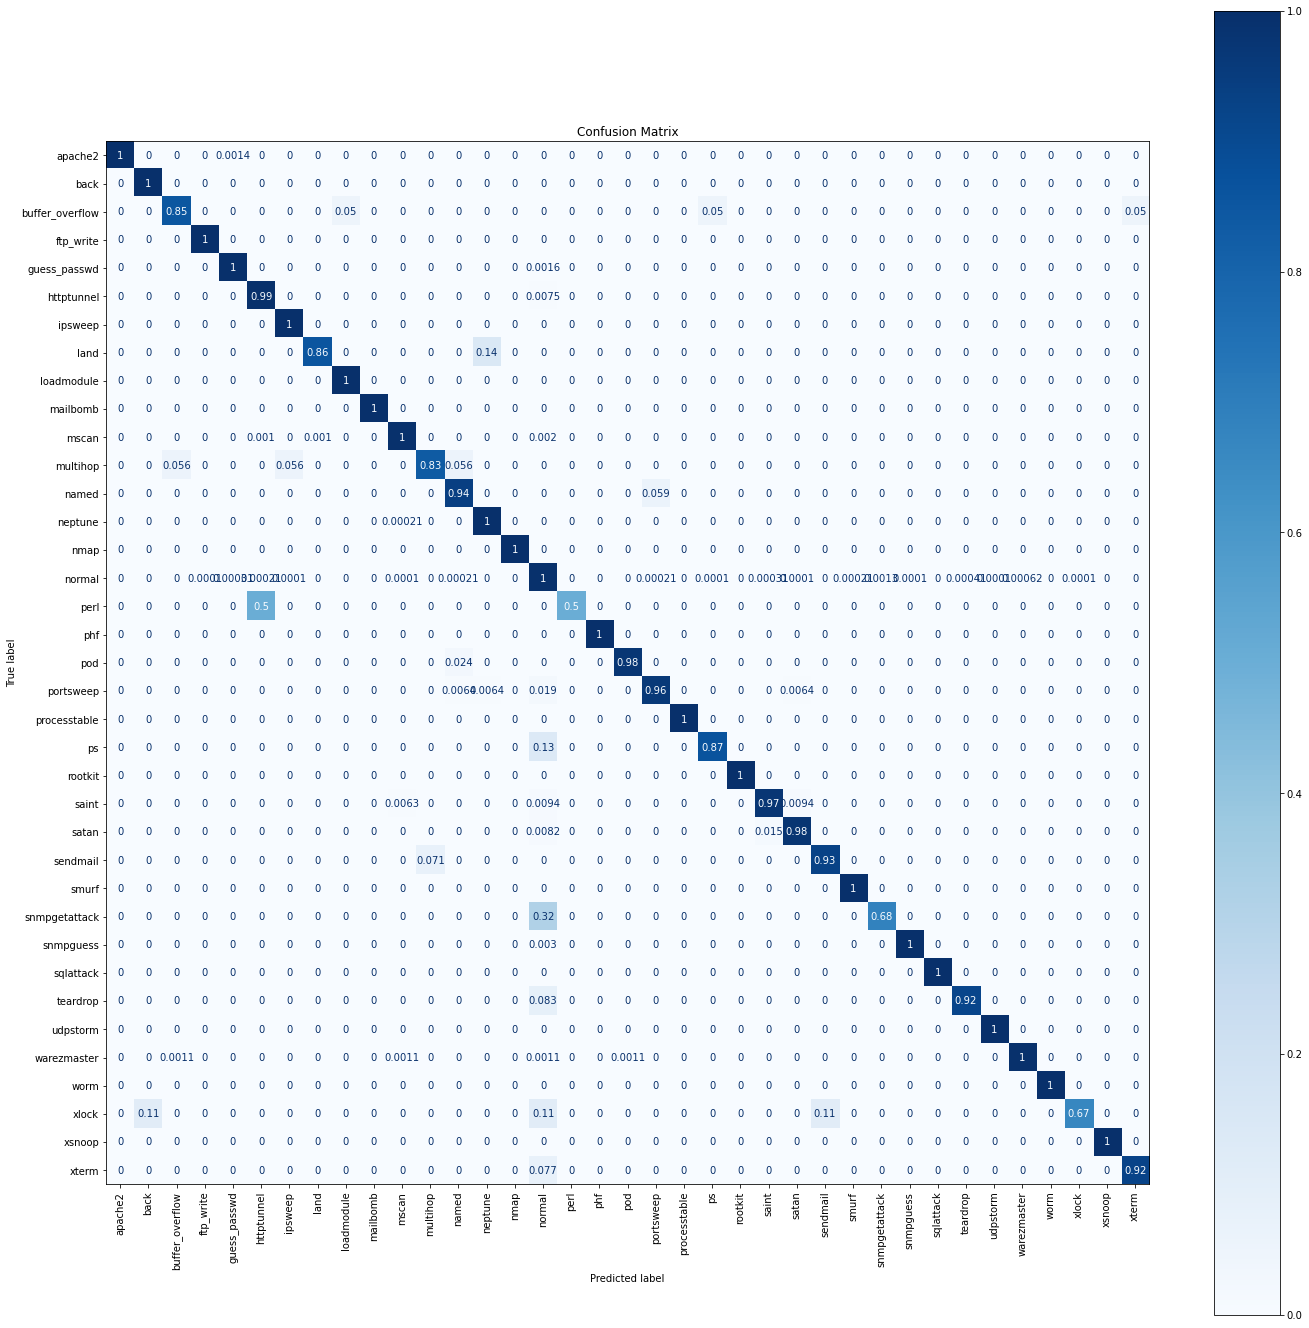

time: 11.7 s


In [20]:
#Confusion Matrix

# figure settings
figure_width = 50 # cm
figure_height = 50 # cm
left_right_magrin = 2 # cm
top_bottom_margin = 2 # cm

# Don't change
left   = left_right_magrin / figure_width # Percentage from height
bottom = top_bottom_margin / figure_height # Percentage from height
width  = 1 - left*2
height = 1 - bottom*2
cm2inch = 1/2.54 # inch per cm

# specifying the width and the height of the box in inches
fig = plt.figure(figsize=(figure_width*cm2inch,figure_height*cm2inch))
ax = fig.add_axes((left, bottom, width, height))


disp = plot_confusion_matrix(dt, df_x, df_y, cmap=plt.cm.Blues, normalize='true', 
                             include_values=True, xticks_rotation='vertical', 
                             values_format=None, ax=ax)
disp.ax_.set_title("Confusion Matrix")

plt.show()
# fig.savefig('ConfusionMatrix.png', dpi=1000)

# from IPython.display import Image
# Image(filename='ConfusionMatrix.png') 



# Custom Testing:

The following code allows for testing custom data sets so long as they follow the same format as what the system was trained on. Specify which model you would like to test on and which individual set of data you would like to test with.

In [60]:
#Choose which model you want to test on: dt, rf, bg, adb, evc (make sure you have created the model above first)
testmodel = dt
print("")

#testing data set (all new set of data unique from the dataset the models were trained on)
tester = pd.read_csv('unique_testing_dataset.csv')
print("What row do you want to test on? (0-25191)")
verify_row = int(input())
print("")

print(tester.iloc[verify_row,4:40])

print("")

print("prediction:", testmodel.predict([tester.iloc[verify_row,4:40]]))
print("true value:",tester.iloc[verify_row,41])
    


What row do you want to test on? (0-25191)
25191

src_bytes                         0
dst_bytes                         0
land                              0
wrong_fragment                    0
urgent                            0
hot                               0
num_failed_logins                 0
logged_in                         0
num_compromised                   0
root_shell                        0
su_attempted                      0
num_root                          0
num_file_creations                0
num_shells                        0
num_access_files                  0
num_outbound_cmds                 0
is_host_login                     0
is_guest_login                    0
count                            38
srv_count                         9
serror_rate                       1
srv_serror_rate                   1
rerror_rate                       0
srv_rerror_rate                   0
same_svr_rate                  0.24
diff_srv_rate                  0.11
srv_diff_host

# Clarrifying Notes

## Accuracy vs Recall vs Precision:

- #### Accuracy 
= # of correct predictions / total # of predictions = (True Positive + True Negative)/(True Positive + True Negative + False Positive + False Negative); 
or total number of predictions a model gets right.

- #### Recall 
= True Positive / (True Positive + False Negative); 
or the percentage of actual positives a model correctly identified.
    - When the cost of a false negative is high, you should use recall.

- #### Precision 
= True Positive / (True Positive + False Positive); 
or how precise a model is in predicting positive labels.
    - Precision is a good evaluation metric to use when the cost of a false positive is very high and the cost of a false negative is low.

##### Though similiar, what the model is predicting defines which of these three metrics are most valuable. For example, if you are trying to predict credit card fraud, accuracy is a good measurement for the model as false positives are more acceptable since they are only minor inconveniences in this scenario, however, if you are trying to model an illness such as a malignant tumor, false positives and false negatives should be minimizes as much as possible. 

In [77]:
import scipy.io
mat = scipy.io.loadmat('nsl_kdd_pytorch.mat')
mat = {k:v for k, v in mat.items() if k[0] != '_'}
data = pd.DataFrame({k: pd.Series(v[0]) for k, v in mat.iteritems()})
data.to_csv("nsl_kdd_pytorch.csv")

AttributeError: 'dict' object has no attribute 'iteritems'

time: 229 ms
